In [1]:
from collections.abc import Sequence
import json
from pathlib import Path

import matplotlib.pyplot as plt

EPSILON = 1e-3

plt.style.use("seaborn-v0_8-deep")
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Liberation Serif"]
plt.rcParams["font.size"] = 18

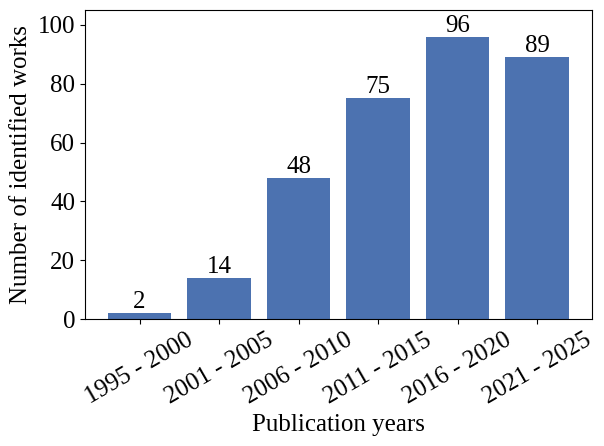

In [2]:
plt.clf()
plt.xlabel("Publication years")
plt.ylabel("Number of identified works")
plt.ylim(0, 105)
plt.xticks(rotation=30)
b = plt.bar(
    x=["1995 - 2000", "2001 - 2005", "2006 - 2010", "2011 - 2015", "2016 - 2020", "2021 - 2025"],
    height=[2, 14, 48, 75, 96, 89]
)
plt.bar_label(b)
plt.tight_layout()
plt.savefig("./out/sr-per-year.pdf", metadata={"CreationDate": None, "ModDate": None})

In [3]:
def rq_boxplot(
    *,
    input: str,
    output: str | None = None,
    ais: Sequence[int],
    title: str = "[TODO] RQ",
    xlabel: str = "Approaches",
    ylabel: str = "[TODO] Metric",
    tlabel: Sequence[str]
) -> None:
    if output is None:
        output = input
    assert len(ais) == len(tlabel)

    with Path.open(f"../tcp-framework/out/{input}.json", "r") as f:
        data = json.load(f)
    values = [[sum(ds[ai]) / len(ds[ai]) for ds in data.values()] for ai in ais]

    plt.clf()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.boxplot(values, tick_labels=tlabel, medianprops={"color": "C2", "linewidth": 2})
    plt.tight_layout()
    plt.savefig(f"./out/{output}.pdf", metadata={"CreationDate": None, "ModDate": None})


def rq_table(
    *,
    input: str,
    ais: Sequence[int],
    xlabel: str = "Approaches",
    ylabel: str = "[TODO] Metric",
    tlabel: Sequence[str],
    subsequent: bool = False,
) -> None:
    def sp(count: int = 4) -> str:
        return " " * count
    def bf(content: str) -> str:
        return r"\textbf{" + content + r"}"
    def tt(content: str) -> str:
        return r"\texttt{" + content + r"}"
    def fmt(number: float) -> str:
        out = f"{number:.3f}"
        if out.startswith("0."):
            out = out[1:]
        return out
    def ds(content: str) -> str:
        return content if not subsequent else ""
    AM = " & "

    assert len(ais) == len(tlabel)

    with Path.open(f"../tcp-framework/out/{input}.json", "r") as f:
        data = json.load(f)
    rows = [[sum(ap) / len(ap) for ap in ds] for ds in data.values()]

    print(r"\begin{tabular}{" + ds("l ") + " ".join(["r"] * len(ais)) + r"}")
    print(sp() + r"\toprule")
    print(sp() + ds(r"\multirow{2}{*}{" + bf("Subject program") + r"} & ") + r"\multicolumn{" + str(len(ais)) + r"}{c}{" + bf(xlabel + r" {\footnotesize(" + ylabel + r")}") + r"} \\")
    print(sp() + ds(AM) + AM.join([bf(v) for v in tlabel]) + r" \\ \midrule")
    for d, row in zip(data.keys(), rows, strict=True):
        values = [v for i, v in enumerate(row) if i in ais]
        cells = [(fmt(v) if v + EPSILON < max(values) else bf(fmt(v))) for v in values]
        print(sp() + ds(tt(d) + AM) + AM.join(cells) + r" \\")
    print(sp() + r"\bottomrule")
    print(r"\end{tabular}")


def rq(
    *,
    input: str,
    output: str | None = None,
    ais: Sequence[int],
    title: str = "[TODO] RQ",
    xlabel: str = "Approaches",
    ylabel: str = "[TODO] Metric",
    tlabel: Sequence[str],
    subsequent: bool = False,
) -> None:
    rq_boxplot(
        input=input,
        output=output,
        ais=ais,
        title=title,
        xlabel=xlabel,
        ylabel=ylabel,
        tlabel=tlabel,
    )
    rq_table(
        input=input,
        ais=ais,
        xlabel=xlabel,
        ylabel=ylabel,
        tlabel=tlabel,
        subsequent=subsequent,
    )

\begin{tabular}{l r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{3}{c}{\textbf{Normalization {\footnotesize(rAPFD)}}} \\
     & \textbf{None} & \textbf{Formatting} & \textbf{Identifiers} \\ \midrule
    \texttt{LittleProxy} & .481 & .524 & \textbf{.556} \\
    \texttt{HikariCP} & .289 & .334 & \textbf{.384} \\
    \texttt{jade4j} & .452 & \textbf{.671} & .498 \\
    \texttt{wicket-bootstrap} & .725 & \textbf{.731} & .532 \\
    \texttt{titan} & .111 & .170 & \textbf{.328} \\
    \texttt{dynjs} & .481 & .415 & \textbf{.532} \\
    \texttt{jsprit} & .539 & \textbf{.556} & .533 \\
    \texttt{DSpace} & \textbf{.433} & .345 & .406 \\
    \texttt{optiq} & .444 & .419 & \textbf{.522} \\
    \texttt{cloudify} & .447 & \textbf{.453} & .413 \\
    \texttt{okhttp} & .315 & \textbf{.316} & .312 \\
    \bottomrule
\end{tabular}


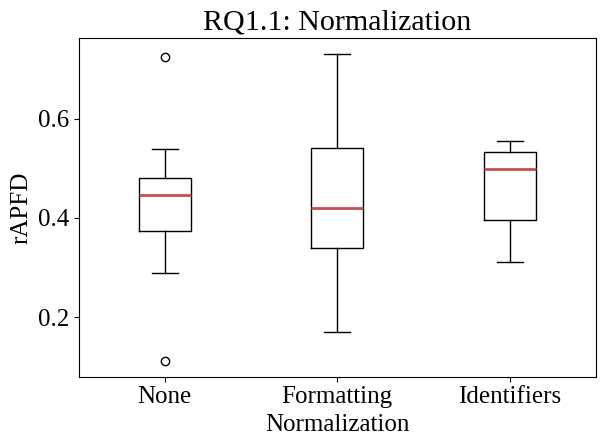

In [4]:
rq(
    input="rq11",
    ais=range(3),
    title="RQ1.1: Normalization",
    xlabel="Normalization",
    ylabel="rAPFD",
    tlabel=["None", "Formatting", "Identifiers"]
)

\begin{tabular}{r r}
    \toprule
    \multicolumn{2}{c}{\textbf{Distance {\footnotesize(rAPFD)}}} \\
    \textbf{Manhattan} & \textbf{Euclidean} \\ \midrule
    \textbf{.567} & .556 \\
    .339 & \textbf{.384} \\
    .476 & \textbf{.498} \\
    .529 & \textbf{.532} \\
    \textbf{.339} & .328 \\
    \textbf{.534} & .532 \\
    \textbf{.548} & .533 \\
    .302 & \textbf{.406} \\
    .492 & \textbf{.522} \\
    \textbf{.420} & .413 \\
    .295 & \textbf{.312} \\
    \bottomrule
\end{tabular}


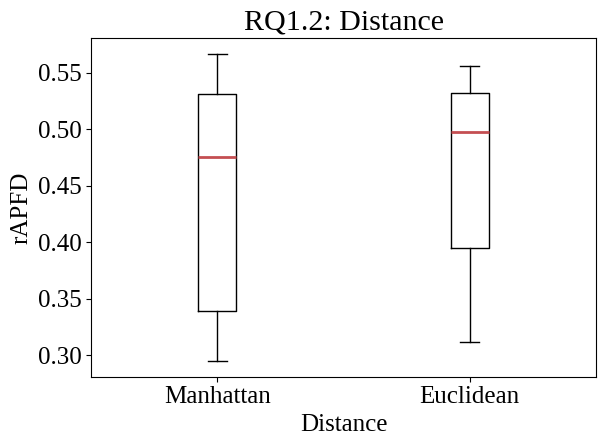

In [5]:
rq(
    input="rq12",
    ais=range(2),
    title="RQ1.2: Distance",
    xlabel="Distance",
    ylabel="rAPFD",
    tlabel=["Manhattan", "Euclidean"],
    subsequent=True
)

\begin{tabular}{r r r}
    \toprule
    \multicolumn{3}{c}{\textbf{Aggregation {\footnotesize(rAPFD)}}} \\
    \textbf{Min} & \textbf{Average} & \textbf{Max} \\ \midrule
    .556 & .500 & \textbf{.642} \\
    .384 & .376 & \textbf{.429} \\
    \textbf{.498} & .477 & .415 \\
    .532 & \textbf{.534} & .380 \\
    .328 & .390 & \textbf{.719} \\
    .532 & \textbf{.536} & .328 \\
    .533 & \textbf{.584} & .512 \\
    \textbf{.406} & .282 & .362 \\
    \textbf{.522} & .416 & .455 \\
    \textbf{.413} & .340 & .252 \\
    .312 & .437 & \textbf{.469} \\
    \bottomrule
\end{tabular}


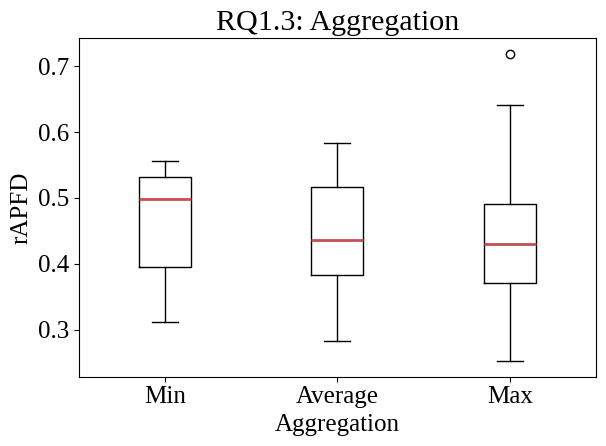

In [6]:
rq(
    input="rq13",
    ais=range(3),
    title="RQ1.3: Aggregation",
    xlabel="Aggregation",
    ylabel="rAPFD",
    tlabel=["Min", "Average", "Max"],
    subsequent=True
)

In [7]:
# rq(
#     input="rq21",
#     ais=range(5),
#     ylabel="rAPFDc",
#     tlabel=["A1", "A2", "A3", "A4", "A5"]
# )

\begin{tabular}{l r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{3}{c}{\textbf{Approaches {\footnotesize(rAPFDc)}}} \\
     & \textbf{TotalFails} & \textbf{ExeTime} & \textbf{Breaked} \\ \midrule
    \texttt{LittleProxy} & .678 & .501 & \textbf{.709} \\
    \texttt{HikariCP} & .583 & \textbf{.662} & .594 \\
    \texttt{jade4j} & .606 & \textbf{.633} & .616 \\
    \texttt{wicket-bootstrap} & .744 & .497 & \textbf{.905} \\
    \texttt{titan} & .888 & .313 & \textbf{.901} \\
    \texttt{dynjs} & .835 & .808 & \textbf{.948} \\
    \texttt{jsprit} & .819 & .626 & \textbf{.897} \\
    \texttt{DSpace} & .739 & .662 & \textbf{.819} \\
    \texttt{optiq} & .852 & .697 & \textbf{.940} \\
    \texttt{cloudify} & .767 & .641 & \textbf{.809} \\
    \texttt{okhttp} & .865 & .556 & \textbf{.884} \\
    \bottomrule
\end{tabular}


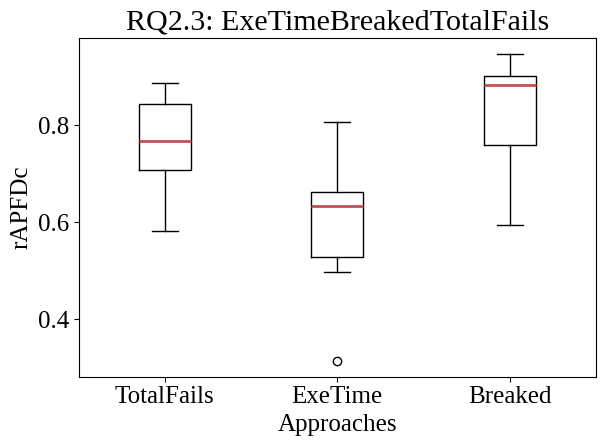

In [8]:
rq(
    input="rq23",
    output="rq23-exe",
    ais=[0, 1, 3],
    title="RQ2.3: ExeTimeBreakedTotalFails",
    ylabel="rAPFDc",
    tlabel=["TotalFails", "ExeTime", "Breaked"]
)

\begin{tabular}{l r r r}
    \toprule
    \multirow{2}{*}{\textbf{Subject program}} & \multicolumn{3}{c}{\textbf{Approaches {\footnotesize(rAPFDc)}}} \\
     & \textbf{TotalFails} & \textbf{CodeDist} & \textbf{Breaked} \\ \midrule
    \texttt{LittleProxy} & .678 & .614 & \textbf{.679} \\
    \texttt{HikariCP} & \textbf{.583} & .450 & .579 \\
    \texttt{jade4j} & .606 & .379 & \textbf{.615} \\
    \texttt{wicket-bootstrap} & .744 & .557 & \textbf{.811} \\
    \texttt{titan} & .888 & .505 & \textbf{.915} \\
    \texttt{dynjs} & .835 & .397 & \textbf{.920} \\
    \texttt{jsprit} & .819 & .604 & \textbf{.847} \\
    \texttt{DSpace} & .739 & .427 & \textbf{.818} \\
    \texttt{optiq} & .852 & .703 & \textbf{.915} \\
    \texttt{cloudify} & .767 & .358 & \textbf{.804} \\
    \texttt{okhttp} & .865 & .368 & \textbf{.878} \\
    \bottomrule
\end{tabular}


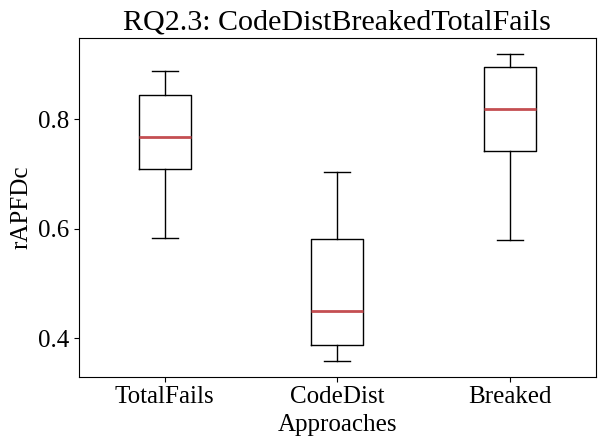

In [9]:
rq(
    input="rq23",
    output="rq23-code",
    ais=[0, 2, 4],
    title="RQ2.3: CodeDistBreakedTotalFails",
    ylabel="rAPFDc",
    tlabel=["TotalFails", "CodeDist", "Breaked"]
)